In [1]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import numpy as np 
import os 
import pandas as pd 
import librosa
import librosa.display
import soundfile as sf # for accessing file information
from scipy.io import wavfile
import IPython.display as ipd

In [2]:
path = 'baby cry'

In [3]:
def load_data(directory):
  
    subdirs = os.listdir(directory)
    wavforms = []
    labels = []
    for dirc in subdirs:
        filenames = os.listdir(directory+'/'+dirc)
        for filename in filenames:
            # Get wavform from each file 
            wav = wavfile.read(directory+'/'+dirc+'/'+filename)[1]
                
            # Store wavform and appropriate label
            wavforms.append(wav)
            labels.append(dirc)
            
            
    return np.array(wavforms), np.array(labels)



In [4]:
data, labels = load_data(directory = path)

In [5]:
def amplitude_envelope(signal, frame_size, hop_length):
    """calculate the amplitude envelope of a signal with a given frame size."""
    return np.array([max(signal[i:i+frame_size]) for i in range(0, len(signal), hop_length)])

In [6]:
def rmse(signal, frame_size, hop_length):
    rmse = []
    '''Root Mean square Energy'''
    # calculate rmse for each frame
    for i in range(0, len(signal), hop_length): 
        rmse_current_frame = np.sqrt(sum(signal[i:i+frame_size]**2) / frame_size)
        rmse.append(rmse_current_frame)
    return np.array(rmse)

In [7]:
def amplitude_features(signal, f, h):
    ae  = amplitude_envelope(signal, frame_size = f, hop_length= h)
    ar = rmse(signal, frame_size = f, hop_length= h)
    frames1 = range(len(ae))
    frames2 = range(len(ar))
    t1 = librosa.frames_to_time(frames1, hop_length=128)

    plt.figure(figsize=(10, 7))
    plt.subplot(2,1,1)
    #librosa.display.waveplot(ae, alpha=0.5)
    plt.plot(t1, ae, color="r")
    #plt.ylim((-1, 1))
    plt.title("Amplitude Envelope")
    plt.subplot(2,1,2)
    plt.plot(t1, ar, color="r")
    plt.title("RMSE")

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  


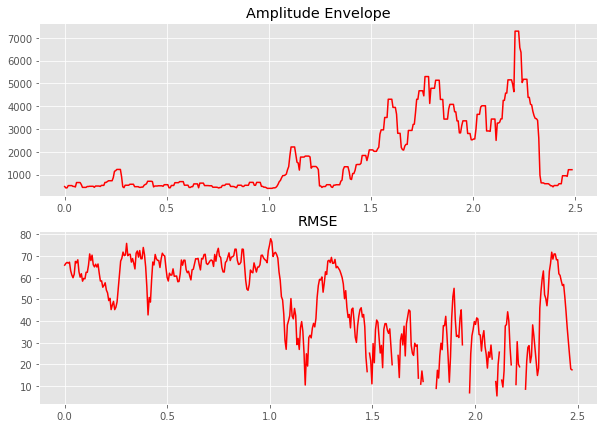

In [8]:
amplitude_features(data[0], f = 512, h = 128 )

In [9]:
def spect_matrix(data):
    create_stft = [librosa.stft(data[i], n_fft=4096, hop_length=512, win_length=2048, window='blackman', center=True) for i in range(0,len(data))]
    db_stft = [librosa.amplitude_to_db(np.abs(s)) for s in create_stft]
    
    return np.array(db_stft)

In [10]:
def plot_spectogram(db_stft_i):
    
    librosa.display.specshow(db_stft_i, y_axis='log', x_axis='time')
    plt.title('Power spectrogram')
    plt.colorbar(format='%+2.0f dB')
    plt.tight_layout()
    
    

In [11]:
spectogram_matrix = spect_matrix(data)

ParameterError: Audio data must be floating-point

In [18]:
spectogram_matrix.shape

NameError: name 'spectogram_matrix' is not defined

In [12]:
print(labels[95], '\tlabels[0--95]')
print(labels[143], '\tlabels[96-143]')
print(labels[305], '\tlabels[144--305]')
print(labels[445], '\t\tlabels[306--445]')
print(labels[589], '\t\tlabels[446--589]')

belly_pain 	labels[0--95]
burping 	labels[96-143]
discomfort 	labels[144--305]
hungry 		labels[306--445]
tired 		labels[446--589]


In [19]:
def create_ae(data, k , j ):
    '''
    creates an erray of j-k+1 rows : each row is the amplitude envelope of a signal in a specific class
    each column is the maximum amplitude of the signal in a frame ; 517 total frames
    '''
    ae = [amplitude_envelope(data[i], frame_size=512, hop_length=128) for i in range(k,j)]
    return np.array(ae)

In [20]:
ae_hungry = create_ae(data, 306,446)

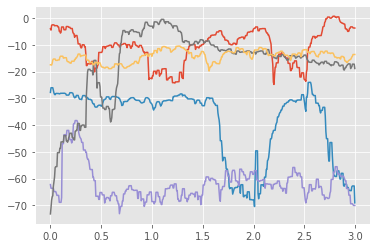

In [21]:
for i in range(5,10):
    frames = range(len(ae_hungry[i]))
    t = librosa.frames_to_time(frames, hop_length=128)
    plt.plot(t,librosa.amplitude_to_db(ae_hungry[i]));

In [30]:
def create_rsme(data, k,j):
    tmp = [rmse(data[i], frame_size=512, hop_length=128) for i in range(k,j)]
    return np.array(tmp)

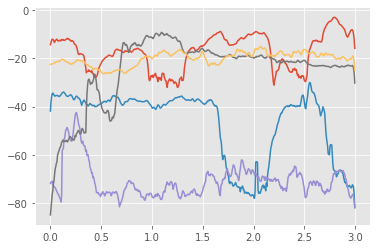

In [31]:
rmse_hungry = create_rsme(data, 306,446)
for i in range(5,10):
    frames = range(len(rmse_hungry[i]))
    t = librosa.frames_to_time(frames, hop_length=128)
    plt.plot(t,librosa.amplitude_to_db(rmse_hungry[i]));

In [116]:
def create_scps(spc_matrix, label,start, end):
    '''
    belly_pain 	labels[0--95]
    burping 	labels[96-143]
    discomfort 	labels[144--305]
    hungry 		labels[306--445]
    tired 		labels[446--589]
    '''
    
    
    for i in range(start,end):
        
        plt.figure(figsize=(7, 4))
        ax = plt.axes()
        ax.set_axis_off()
        plt.set_cmap('hot')
        librosa.display.specshow(spc_matrix[i], y_axis='log', x_axis='time')
        #plt.colorbar()
        plt.savefig('C:/Users/DELL/Downloads/spc_extraction/'+ label+'/spc'+str(i)+'.png', bbox_inches='tight', transparent=True, pad_inches=0.0 )

    